Implement the CBOW model

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

sentences = '/content/cbow.txt'

In [ ]:
file = open('cbow.txt','r')
s = ""

for i in file :
  s=s+i;
print(s)


As a human, intuitively speaking, it doesn’t make much sense in 
wanting to represent words or any other object in the universe 
using numbers because numbers are used for quantification and why 
would one need to quantify words?

When in science, we say speed of my car is 45 km/hr we gain a sense 
of how fast/slow we are driving. If we say my friend is driving at 
60 km/hr, we can compare which one of us is going faster. Furthermore,
 we can calculate where we will be at a certain point in time, when
 we will reach our destination given we know the distance of our 
journey etc etc.

Similarly, outside of science, we use numbers to quantify a quality, 
when we quote the price of an object we try to quantify its worth, 
the size of a garment we try to quantify the body proportions it will 
fit best.

All of these representations make sense because by using numbers we 
have made analysis and comparisons based on those qualities much much 
easier. What’s worth more a shoe or a purse? Well

In [ ]:
sentences = s

In [ ]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

In [ ]:
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [ ]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['as', 'human', 'speaking', 'it'], 'intuitively'), (['human', 'intuitively', 'it', 'doesn'], 'speaking'), (['intuitively', 'speaking', 'doesn', 'make'], 'it'), (['speaking', 'it', 'make', 'much'], 'doesn'), (['it', 'doesn', 'much', 'sense'], 'make')]


In [ ]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [ ]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

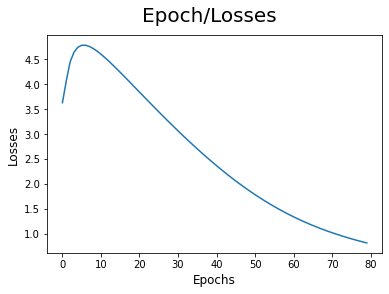

In [ ]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [ ]:
predict(['as', 'human', 'speaking', 'it'])

'intuitively'

In [ ]:
predict(['all', 'of', 'this', 'make'])

'the'

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return round((1 - (wrong / len(data))),3)
accuracy()

0.901